<a href="https://colab.research.google.com/github/szn5400/IST597_HW2/blob/main/Copy_of_STT_water_git_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is code for Water output for 500 epochs 
# Data is shuffled
# Rescaling done with data from the full dataset

import sys
sys.path.append('/content/drive/MyDrive/code/MLP')

from read_data import read
import os
import numpy as np
import glob
import collections
from read_model import MLP_single
from data_to_numpy import numpy_single


#read data
all_pressures,all_saturations,all_permeabilities,all_porosities,all_surf_inj_rate_series,all_surf_prod_rate_series,Ks,Rs,saturations_min,saturations_max,pressure_min,pressure_max,surf_prod_rate_series_max,surf_prod_rate_series_min = read()

#convert to numpy
features1_tr,target1_tr,features1_te,target1_te = numpy_single(all_pressures,all_saturations,all_permeabilities,all_porosities,all_surf_inj_rate_series,all_surf_prod_rate_series,Ks,Rs,all_surf_prod_rate_series)



#train model MLP
batch_size = 250
model = MLP_single()

history = model.fit(features1_tr, target1_tr, epochs=500, batch_size=250,shuffle=True, verbose=1)

model.evaluate(features1_te,target1_te)

All files: ['/content/drive/MyDrive/data/k1r1-h.out', '/content/drive/MyDrive/data/k1r2-h.out', '/content/drive/MyDrive/data/k1r3-h.out', '/content/drive/MyDrive/data/k1r4-h.out', '/content/drive/MyDrive/data/k1r5-h.out', '/content/drive/MyDrive/data/k1r6-h.out', '/content/drive/MyDrive/data/k1r7-h.out', '/content/drive/MyDrive/data/k1r8-h.out', '/content/drive/MyDrive/data/k1r9-h.out', '/content/drive/MyDrive/data/k2r1-h.out', '/content/drive/MyDrive/data/k2r2-h.out', '/content/drive/MyDrive/data/k2r3-h.out', '/content/drive/MyDrive/data/k2r4-h.out', '/content/drive/MyDrive/data/k2r5-h.out', '/content/drive/MyDrive/data/k2r6-h.out', '/content/drive/MyDrive/data/k2r7-h.out', '/content/drive/MyDrive/data/k2r8-h.out', '/content/drive/MyDrive/data/k2r9-h.out', '/content/drive/MyDrive/data/k3r1-h.out', '/content/drive/MyDrive/data/k3r2-h.out', '/content/drive/MyDrive/data/k3r3-h.out', '/content/drive/MyDrive/data/k3r4-h.out', '/content/drive/MyDrive/data/k3r5-h.out', '/content/drive/MyDriv

[4.0558177715865895e-05, 0.00331016699783504]

In [ ]:
model.evaluate(features1_te,target1_te)

12481/12481 [==============================] - 21s 2ms/step - loss: 4.0558e-05 - mae: 0.0033


[4.0558177715865895e-05, 0.00331016699783504]

In [ ]:
model_json = model.to_json()
with open("model_git_500_shuf_STT_water.json","w") as file:
    file.write(model_json)
    
model.save_weights("weights_git_500_shuf_STT_water.h5")

In [ ]:
water_pred = model.predict(features1_te)

In [ ]:
len_water_pred = len(water_pred)
water_predicted = [0]*len_water_pred
water_original = [0]*len_water_pred
error_water = [0]*len_water_pred
Error_water = 0
for i in range(len_water_pred):
  water_original[i] = (target1_te[i]*(surf_prod_rate_series_max-surf_prod_rate_series_min))+surf_prod_rate_series_min
  water_predicted[i] = (water_pred[i]*(surf_prod_rate_series_max-surf_prod_rate_series_min))+surf_prod_rate_series_min  
  error_water[i] = abs(water_original[i]-water_predicted[i])
  error_water_mse = pow((water_original[i]-water_predicted[i]),2)
  Error_water+=error_water_mse
Error_water_mse = Error_water/len_water_pred
print("Mse error for water saturation:",Error_water_mse)

Mse error for water saturation: [41.29967726]


In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(start=0,stop=10,num=len(target1_te))

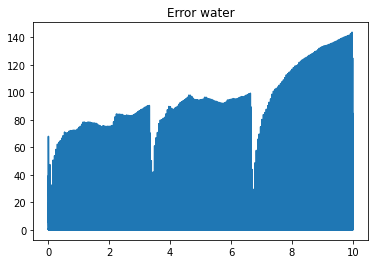

In [ ]:
plt.plot(x,error_water)
plt.title("Error water")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
ix = np.linspace(start=0,stop=100,num=71*25*25*3)

In [ ]:
plot_water_org = water_original[71*25*25*3:2*71*25*25*3]
plot_water_predicted = water_predicted[71*25*25*3:2*71*25*25*3]

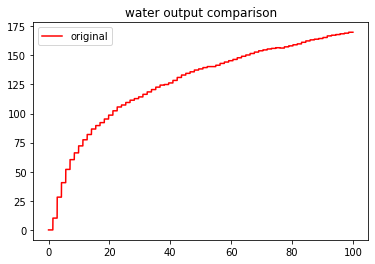

In [ ]:
plt.plot(ix,plot_water_org,color='r',label='original')
#plt.plot(ix,plot_water_predicted,color='g',label='predicted')
plt.title("water output comparison")
plt.legend()
plt.show()